### Importing Libaries

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding Data

In [2]:

df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2339,ham,Cheers for the message Zogtorius. IåÕve been s...,NaN,NaN,NaN
4622,ham,U need my presnts always bcz U cant mis love. ...,NaN,NaN,NaN
576,ham,I'm tired of arguing with you about this week ...,NaN,NaN,NaN
617,ham,For my family happiness..,NaN,NaN,NaN
2008,ham,See the forwarding message for proof,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

### 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Drop Last 3 Columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Rename the Columns
df.rename(columns={'v1': 'Target', 'v2': 'Text'}, inplace=True)

In [10]:
# Encode Target Column 

from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

df['Target'] = encoder.fit_transform(df['Target'])

In [11]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Check Missing Values 
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
# Check for Duplicate Values
df.duplicated().sum()

np.int64(403)

In [14]:
# Remove Duplicates 
df = df.drop_duplicates(keep='first')

In [15]:
# Check for Duplicate Values After
df.duplicated().sum()

np.int64(0)

In [16]:
# Shape of Data
df.shape

(5169, 2)

### 2. EDA

In [17]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

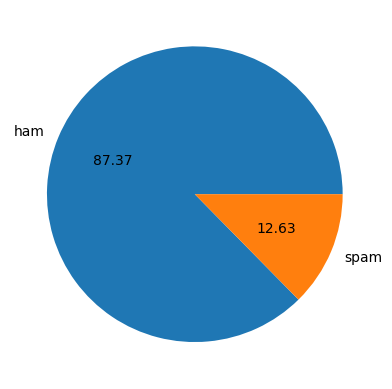

In [19]:
# Pie Chart to Show Data Division
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

##### Data is Imbalanced

In [20]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rawat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
# Create Column with No. of Characters 
df['Num_Characters'] = df['Text'].apply(len)

In [40]:
# Number of Words 
df['Word_Count'] = df['Text'].apply( lambda x : len(nltk.wordpunct_tokenize(x)))

In [41]:
df.head()

,Target,Text,Num_Characters,Word_Count
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16


In [55]:
import spacy
import re
nlp = spacy.load("en_core_web_sm")
text = "This is a sentence. Here's another one!"

def len_sentence(text):
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]
    return len(sentences)

# Number of Sentence 
df['Num_Sentence'] = df['Text'].apply( lambda x : len_sentence(x))


In [56]:
# Number of Sentence 

# df['Text'].apply( lambda x : nltk.sent_tokenize(x))

In [57]:
df.head()

,Target,Text,Num_Characters,Word_Count,Num_Sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1


In [58]:
df[['Num_Characters', 'Word_Count', 'Num_Sentence']].describe()

,Num_Characters,Word_Count,Num_Sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,19.202747,2.100987
std,58.236293,13.963696,1.456628
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,117.000000,28.000000,3.000000
max,910.000000,210.000000,27.000000


In [62]:
# ham
df[df['Target'] == 0][['Num_Characters','Word_Count','Num_Sentence']].describe()

,Num_Characters,Word_Count,Num_Sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.448627,1.961913
std,56.358207,13.769106,1.400953
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,52.000000,13.000000,2.000000
75%,90.000000,22.000000,2.000000
max,910.000000,210.000000,27.000000


In [63]:
# Spam
df[df['Target'] == 1][['Num_Characters','Word_Count','Num_Sentence']].describe()

,Num_Characters,Word_Count,Num_Sentence
count,653.000000,653.000000,653.000000
mean,137.891271,31.333844,3.062787
std,30.137753,7.997049,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,28.000000,2.000000
50%,149.000000,33.000000,3.000000
75%,157.000000,36.000000,4.000000
max,224.000000,49.000000,9.000000


<Axes: xlabel='Num_Characters', ylabel='Count'>

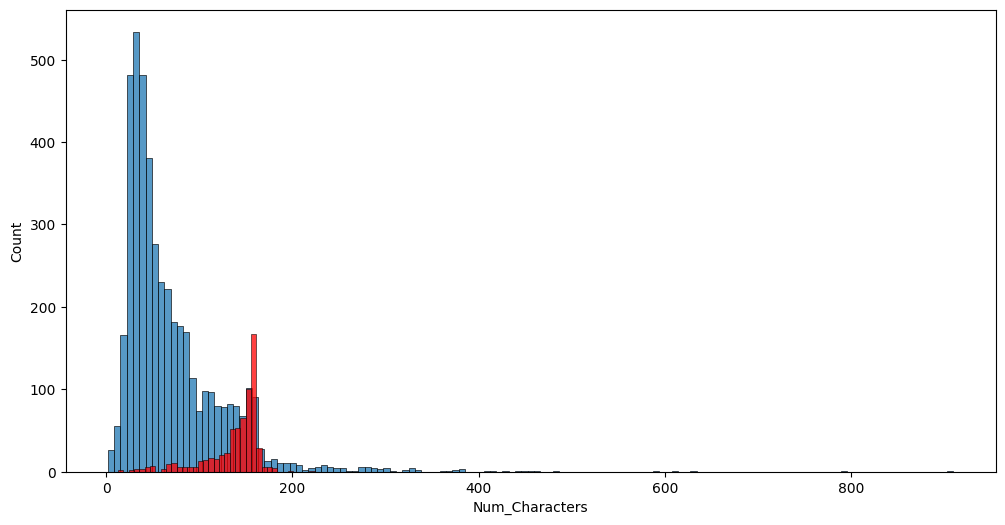

In [ ]:

plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['Num_Characters'])  # Ham
sns.histplot(df[df['Target'] == 1]['Num_Characters'],color='red') # Spam

<Axes: xlabel='Word_Count', ylabel='Count'>

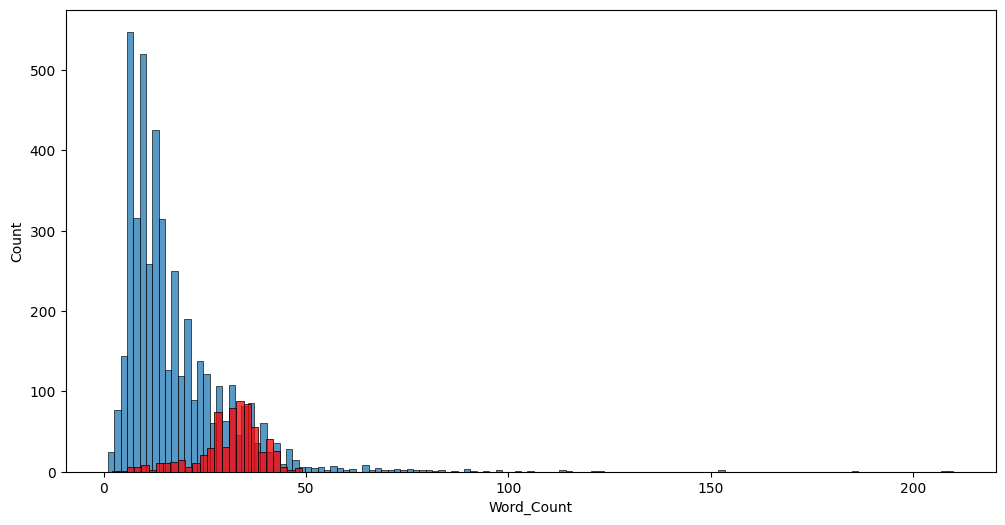

In [67]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['Word_Count'])  # Ham
sns.histplot(df[df['Target'] == 1]['Word_Count'],color='red') # Spam

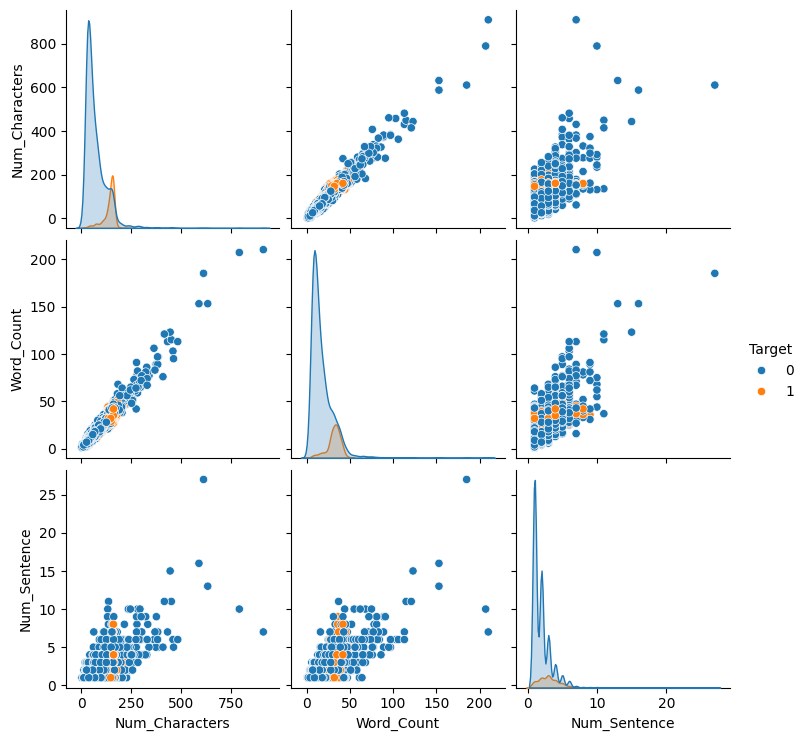

In [68]:
sns.pairplot(df,hue='Target')

<Axes: >

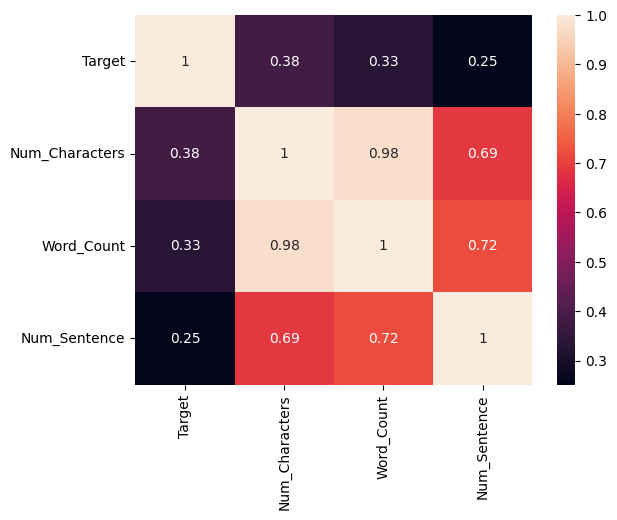

In [72]:
sns.heatmap(df[['Target', 'Num_Characters','Word_Count','Num_Sentence']].corr(), annot=True)

### 3. Text/Data Preprocessing

1. Lower case
2. Tokenization
3. Removing Special Characters
4. Removing Stop words and punctuation
5. Stemming

In [83]:
from nltk.corpus import stopwords
import string

In [84]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [88]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [90]:
def transform_text(text):
    text = text.lower()
    text = nltk.wordpunct_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [93]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")
# transform_text("Hi how are you Anuj ?")

'gonna home soon want talk stuff anymor tonight k cri enough today'

In [94]:
df['Transformed_text'] = df['Text'].apply(transform_text)
df.head()

,Target,Text,Num_Characters,Word_Count,Num_Sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though


In [96]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [98]:
spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep=" "))

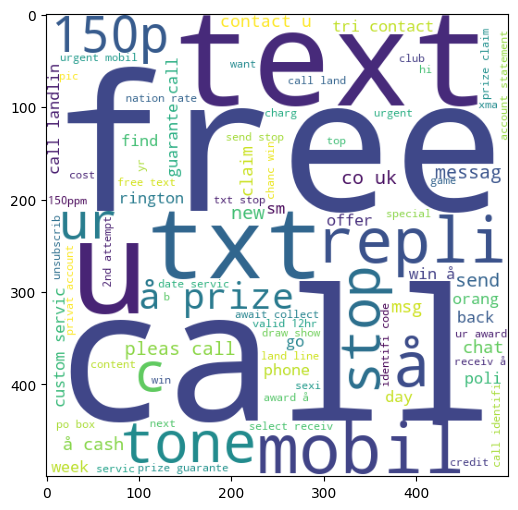

In [99]:
# Word Cloud of Spam Messages 
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [100]:

ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep=" "))

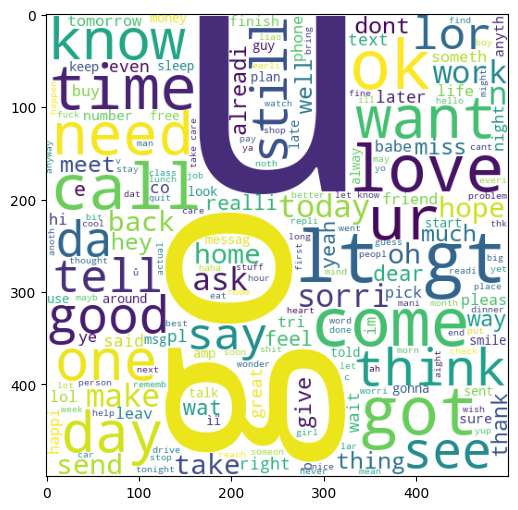

In [101]:
# Word Cloud of ham Messages 

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [102]:
df.head()

,Target,Text,Num_Characters,Word_Count,Num_Sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though


In [109]:

spam_corpus = []
for msg in df[df['Target'] == 1]['Transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [110]:

len(spam_corpus)

11993

C:\Users\rawat\AppData\Local\Temp\ipykernel_13200\2461878628.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=df_common_words, palette=colors)


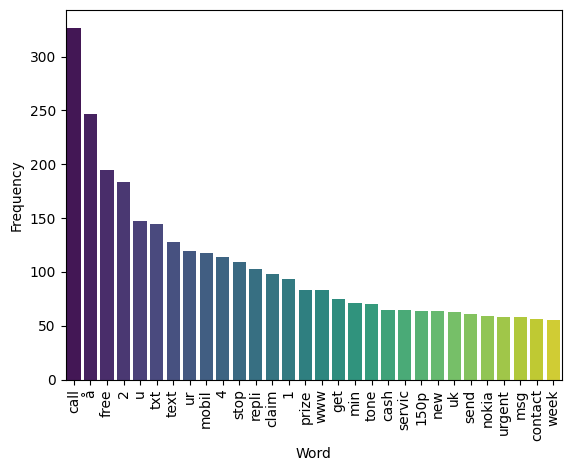

In [123]:
# Get the 30 most common words in the spam corpus
common_words = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the Counter result
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Set a color palette for the bars
colors = sns.color_palette('viridis', n_colors=len(df_common_words))

# Plot the barplot using Seaborn
sns.barplot(x='Word', y='Frequency', data=df_common_words, palette=colors)

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [125]:

ham_corpus = []
for msg in df[df['Target'] == 0]['Transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [126]:

len(ham_corpus)

36368

C:\Users\rawat\AppData\Local\Temp\ipykernel_13200\855378179.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Word', y='Frequency', data=df_common_words, palette=colors)


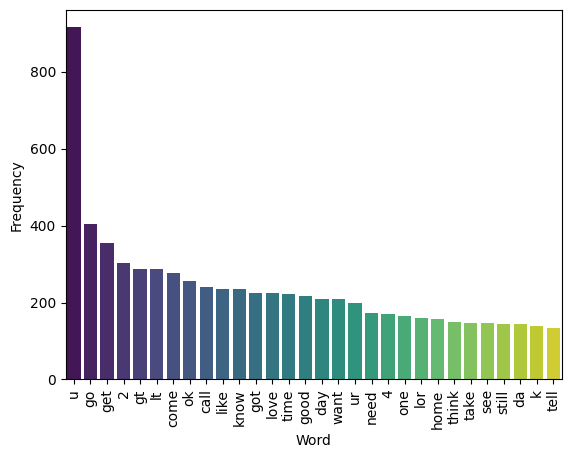

In [128]:
# Get the 30 most common words in the ham corpus
common_words = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the Counter result
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Set a color palette for the bars
colors = sns.color_palette('viridis', n_colors=len(df_common_words))

# Plot the barplot using Seaborn
sns.barplot(x='Word', y='Frequency', data=df_common_words, palette=colors)

# Rotate x-axis labels for readability
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [129]:
# Text Vectorization
# using Bag of Words
df.head()

,Target,Text,Num_Characters,Word_Count,Num_Sentence,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,3,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,2,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though


### Model Building

In [215]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [216]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()
# X = cv.fit_transform(df['Transformed_text']).toarray()

In [217]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [218]:
X.shape

(5169, 7206)

In [219]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [220]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [229]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [222]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [223]:
# For Gaussian Naive Baye's
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy Score : ', accuracy_score(y_test,y_pred1))
print('Confusion Matrix :\n', confusion_matrix(y_test,y_pred1))
print('Precision Score : ',precision_score(y_test,y_pred1))

Accuracy Score :  0.8839458413926499
Confusion Matrix :
 [[796 100]
 [ 20 118]]
Precision Score :  0.5412844036697247


In [224]:
# For Multinomial Naive Baye's
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print('Accuracy Score : ', accuracy_score(y_test,y_pred2))
print('Confusion Matrix :\n', confusion_matrix(y_test,y_pred2))
print('Precision Score : ',precision_score(y_test,y_pred2))

Accuracy Score :  0.9622823984526112
Confusion Matrix :
 [[896   0]
 [ 39  99]]
Precision Score :  1.0


In [225]:
# For Bernoulli Naive Baye's
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print('Accuracy Score : ', accuracy_score(y_test,y_pred3))
print('Confusion Matrix :\n', confusion_matrix(y_test,y_pred3))
print('Precision Score : ',precision_score(y_test,y_pred3))

Accuracy Score :  0.9787234042553191
Confusion Matrix :
 [[894   2]
 [ 20 118]]
Precision Score :  0.9833333333333333


In [226]:
# For Extra Trees Classifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
etc.fit(X_train,y_train)
y_pred4 = etc.predict(X_test)
print('Accuracy Score : ', accuracy_score(y_test,y_pred4))
print('Confusion Matrix :\n', confusion_matrix(y_test,y_pred4))
print('Precision Score : ',precision_score(y_test,y_pred4))

Accuracy Score :  0.9816247582205029
Confusion Matrix :
 [[896   0]
 [ 19 119]]
Precision Score :  1.0


In [227]:
# For Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
rfc.fit(X_train,y_train)
y_pred5 = rfc.predict(X_test)
print('Accuracy Score : ', accuracy_score(y_test,y_pred5))
print('Confusion Matrix :\n', confusion_matrix(y_test,y_pred5))
print('Precision Score : ',precision_score(y_test,y_pred5))

Accuracy Score :  0.9758220502901354
Confusion Matrix :
 [[896   0]
 [ 25 113]]
Precision Score :  1.0


In [228]:
# For Logistic Regression
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train,y_train)
y_pred6 = lrc.predict(X_test)
print('Accuracy Score : ', accuracy_score(y_test,y_pred6))
print('Confusion Matrix :\n', confusion_matrix(y_test,y_pred6))
print('Precision Score : ',precision_score(y_test,y_pred6))

Accuracy Score :  0.9526112185686654
Confusion Matrix :
 [[890   6]
 [ 43  95]]
Precision Score :  0.9405940594059405


In [158]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [198]:

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [199]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb,  
    'LR': lrc, 
    'RF': rfc,  
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [160]:
# clfs = {
#     'SVC' : svc,
#     'KN' : knc, 
#     'NB': mnb, 
#     'DT': dtc, 
#     'LR': lrc, 
#     'RF': rfc, 
#     'AdaBoost': abc, 
#     'BgC': bc, 
#     'ETC': etc,
#     'GBDT':gbdt,
#     'xgb':xgb
# }

In [200]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [162]:

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.971953578336557, np.float64(0.9739130434782609))

In [201]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy Score --> ",current_accuracy)
    print("Precision --> ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy Score -->  0.971953578336557
Precision -->  0.9739130434782609
For  KN
Accuracy Score -->  0.8965183752417795
Precision -->  1.0
For  NB
Accuracy Score -->  0.9622823984526112
Precision -->  1.0
For  LR
Accuracy Score -->  0.9526112185686654
Precision -->  0.9405940594059405
For  RF
Accuracy Score -->  0.9758220502901354
Precision -->  1.0
For  ETC
Accuracy Score -->  0.9816247582205029
Precision -->  1.0
For  GBDT
Accuracy Score -->  0.9516441005802708
Precision -->  0.9680851063829787
For  xgb
Accuracy Score -->  0.9806576402321083
Precision -->  0.9758064516129032


In [164]:
# Performance Sorted by Precision
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [165]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
2,NB,0.962282,1.000000
5,RF,0.975822,1.000000
8,ETC,0.981625,1.000000
10,xgb,0.980658,0.975806
0,SVC,0.971954,0.973913
9,GBDT,0.951644,0.968085
6,AdaBoost,0.970986,0.957627
4,LR,0.952611,0.940594
7,BgC,0.965184,0.886364


In [166]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.896518
1,NB,Accuracy,0.962282
2,RF,Accuracy,0.975822
3,ETC,Accuracy,0.981625
4,xgb,Accuracy,0.980658
5,SVC,Accuracy,0.971954
6,GBDT,Accuracy,0.951644
7,AdaBoost,Accuracy,0.970986
8,LR,Accuracy,0.952611
9,BgC,Accuracy,0.965184


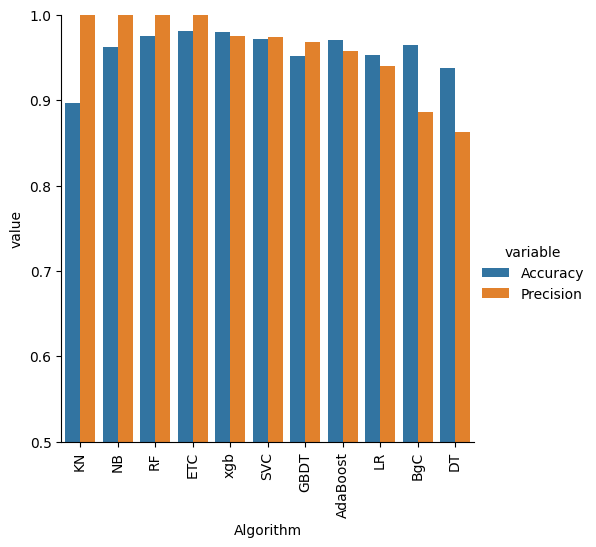

In [167]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [ ]:
new_df_scaled.merge(temp_df,on='Algorithm')

In [ ]:

# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:

voting.fit(X_train,y_train)

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:

from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [230]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))